In [ ]:
import numpy as np
from envs.merged import PointMazeEnv
import os
import imageio
from IPython.display import Video

# Set the Mujoco OpenGL renderer to EGL for headless rendering compatibility
os.environ["MUJOCO_GL"] = "egl"

In [ ]:
data = np.load("datasets/pointmaze_eps50_T100_vm_k5_lvl3_0.npz")
data.files

In [ ]:
data["obs"].shape

In [ ]:
data["frames"][0, -1, :, :, :].shape, data["frames"][1, 0, :, :, :].shape

In [ ]:
# plot the two frames
import matplotlib.pyplot as plt
plt.subplot(1, 2, 1)
plt.imshow(data["frames"][0, -1, :, :, :])
plt.subplot(1, 2, 2)
plt.imshow(data["frames"][1, 0, :, :, :])
plt.show()

---

In [ ]:
import json

with open("datasets/maze_bank_train.json", "r") as f:
    mazes = json.load(f)

In [ ]:
random_idx = np.random.randint(len(mazes['maps']))
maze_map = mazes['maps'][random_idx]
side = max(len(maze_map), len(maze_map[0]))
env = PointMazeEnv(
    maze_map=maze_map,
    # camera_distance=side,
    render_goal=False
)
env.reset()

In [ ]:
# Render initial frame and plot it
initial_frame = env.render()
plt.imshow(initial_frame)
plt.show()

---

In [ ]:
from src.encoder import VisualEncoder
import torch


In [ ]:
encoder = VisualEncoder.load_from_checkpoint("checkpoints/visual_encoder/VisualEncoder-099--0.9170.ckpt")

In [ ]:
# save torch weights of encoder.encoder
torch.save(encoder.encoder.state_dict(), "checkpoints/visual_encoder/visual_encoder_backbone.pth")

---

In [ ]:
from src.data.dataset import PointMazeTransitions
import matplotlib.pyplot as plt

dataset = PointMazeTransitions(
    npz_path = "data/train_trajectories_small.npz",
)

In [ ]:
dataset[0]

---

In [1]:
from src.data.dataset import PointMazeSequences
import matplotlib.pyplot as plt

seq_len = 5
dataset = PointMazeSequences(
    npz_path = "data/prova.npz",
    seq_len=seq_len
)
print(f"Dataset length: {len(dataset)}")

[Dataset] 24 sequences from 4 episodes, seq_len=5, stride=5
Dataset length: 24


States shape: torch.Size([6, 4])
Frames shape: torch.Size([6, 3, 64, 64])
Actions shape: torch.Size([5, 2])


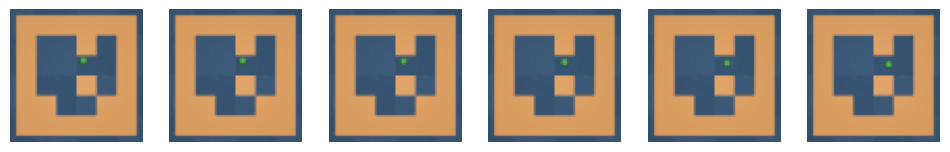

In [4]:
idx = 0
states, frames, actions = dataset[idx]
print(f"States shape: {states.shape}")
print(f"Frames shape: {frames.shape}")
print(f"Actions shape: {actions.shape}")

fig, axs = plt.subplots(1, seq_len + 1, figsize=((seq_len+1) * 2, 3))
for i in range(seq_len + 1):
    axs[i].imshow(frames[i].squeeze().permute(1, 2, 0))
    axs[i].axis('off')
plt.show()

In [3]:
states_curr = states[:-1]
states_next = states[1:]

In [4]:
states_curr.shape, states_next.shape

(torch.Size([5, 4]), torch.Size([5, 4]))

In [5]:
actions

tensor([[ 0.4883,  1.1528],
        [ 0.3152,  1.3998],
        [-0.3891,  1.3998],
        [ 0.2939,  1.0557],
        [-0.0119,  1.3998]])